<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/CAPTCHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pillow

In [ ]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageDraw, ImageFont, ImageTk
import random
import string
import io


def generar_captcha_texto():
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))


def generar_captcha_imagen(texto):
    colores = ["#FF5733", "#2980B9", "#27AE60", "#8E44AD", "#F39C12"]
    img = Image.new('RGB', (200, 70), color='#ECF0F1')
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("arial.ttf", 36)

    for i, char in enumerate(texto):
        draw.text((30 + i * 25, 15), char, font=font, fill=random.choice(colores))

    return img


def verificar():
    if entrada_captcha.get().strip().upper() == captcha_actual:
        root.destroy()
        mostrar_panel_acceso()
    else:
        messagebox.showerror("Error", "CAPTCHA incorrecto.")
        actualizar_captcha()


def actualizar_captcha():
    global captcha_actual, captcha_img
    captcha_actual = generar_captcha_texto()
    imagen = generar_captcha_imagen(captcha_actual)
    bio = io.BytesIO()
    imagen.save(bio, format="PNG")
    bio.seek(0)
    captcha_img = ImageTk.PhotoImage(Image.open(bio))
    etiqueta_img.config(image=captcha_img)
    entrada_captcha.delete(0, tk.END)

def mostrar_panel_acceso():
    ventana = tk.Tk()
    ventana.title("🎉 Acceso Concedido")
    ventana.geometry("400x200")
    ventana.configure(bg="#2ECC71")

    tk.Label(
        ventana,
        text="¡Bienvenido al sistema seguro!",
        font=("Helvetica", 18, "bold"),
        bg="#2ECC71",
        fg="white"
    ).pack(expand=True)

    ventana.mainloop()


root = tk.Tk()
root.title("Verificación CAPTCHA")
root.geometry("400x350")
root.configure(bg="#D6EAF8")

tk.Label(
    root,
    text="Ingrese el CAPTCHA para acceder",
    font=("Helvetica", 16, "bold"),
    bg="#D6EAF8",
    fg="#154360"
).pack(pady=15)

captcha_actual = generar_captcha_texto()
captcha_img = ImageTk.PhotoImage(generar_captcha_imagen(captcha_actual))

etiqueta_img = tk.Label(root, image=captcha_img, bg="#D6EAF8")
etiqueta_img.pack(pady=5)

entrada_captcha = tk.Entry(root, font=("Helvetica", 16), justify="center")
entrada_captcha.pack(pady=10, ipady=5)

boton_verificar = tk.Button(
    root, text="Verificar", font=("Helvetica", 14, "bold"),
    bg="#28B463", fg="white", command=verificar
)
boton_verificar.pack(pady=10)

tk.Button(
    root, text="Cambiar CAPTCHA", font=("Helvetica", 12),
    bg="#F1C40F", fg="black", command=actualizar_captcha
).pack(pady=5)

root.mainloop()

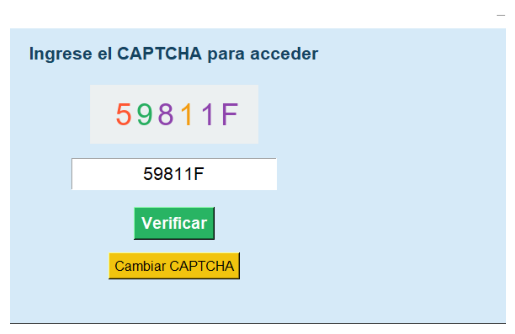

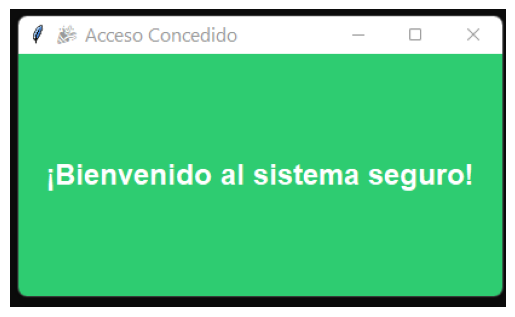

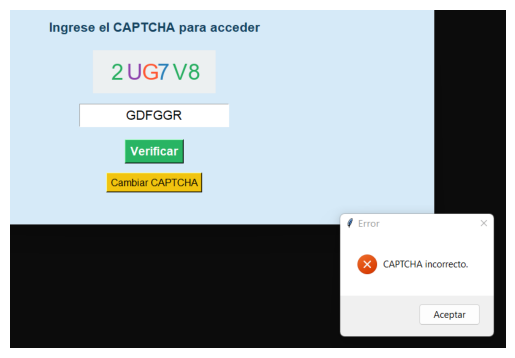

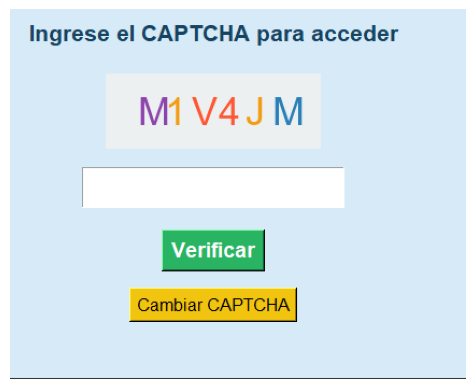

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/Captura de pantalla 2025-06-30 234121.png'
try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}.")

from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/Captura de pantalla 2025-06-30 234138.png'
try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}.")

from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/Captura de pantalla 2025-06-30 234213.png'
try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}.")

from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/Captura de pantalla 2025-06-30 234234.png'
try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}.")

In [ ]:
# con validacion de user y password

In [ ]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageDraw, ImageFont, ImageTk
import random
import string
import io
import datetime


USUARIOS_VALIDOS = {
    "admin": "1234",
    "zero": "cool"
}


def generar_captcha_texto():
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))


def generar_captcha_imagen(texto):
    colores = ["#FF5733", "#2980B9", "#27AE60", "#8E44AD", "#F39C12"]
    img = Image.new('RGB', (200, 70), color='#ECF0F1')
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("arial.ttf", 36)

    for i, char in enumerate(texto):
        draw.text((30 + i * 25, 15), char, font=font, fill=random.choice(colores))

    return img


def verificar():
    usuario = entrada_usuario.get().strip()
    clave = entrada_password.get().strip()
    captcha_ingresado = entrada_captcha.get().strip().upper()

    if usuario in USUARIOS_VALIDOS and USUARIOS_VALIDOS[usuario] == clave:
        if captcha_ingresado == captcha_actual:
            root.destroy()
            mostrar_panel_acceso(usuario)
        else:
            registrar_intento(usuario, "CAPTCHA Incorrecto")
            messagebox.showerror("CAPTCHA Incorrecto", "Verificá el código y volvé a intentarlo.")
            actualizar_captcha()
    else:
        registrar_intento(usuario, "Usuario o contraseña incorrecta")
        messagebox.showerror("Acceso Denegado", "Usuario o contraseña incorrecta.")
        actualizar_captcha()


def registrar_intento(usuario, motivo):
    with open("log_intentos.txt", "a") as log:
        log.write(f"{datetime.datetime.now()} | Usuario: {usuario} | {motivo}\n")

def actualizar_captcha():
    global captcha_actual, captcha_img
    captcha_actual = generar_captcha_texto()
    imagen = generar_captcha_imagen(captcha_actual)
    bio = io.BytesIO()
    imagen.save(bio, format="PNG")
    bio.seek(0)
    captcha_img = ImageTk.PhotoImage(Image.open(bio))
    etiqueta_img.config(image=captcha_img)
    entrada_captcha.delete(0, tk.END)


def mostrar_panel_acceso(usuario):
    ventana = tk.Tk()
    ventana.title("Bienvenido")
    ventana.geometry("400x200")
    ventana.configure(bg="#2ECC71")

    tk.Label(
        ventana,
        text=f"Bienvenido, {usuario}!",
        font=("Helvetica", 18, "bold"),
        bg="#2ECC71",
        fg="white"
    ).pack(expand=True)

    ventana.mainloop()


root = tk.Tk()
root.title("Acceso Seguro")
root.geometry("400x500")
root.configure(bg="#D6EAF8")

tk.Label(root, text="Login Seguro con CAPTCHA", font=("Helvetica", 16, "bold"), bg="#D6EAF8", fg="#154360").pack(pady=10)


tk.Label(root, text="Usuario:", font=("Helvetica", 12), bg="#D6EAF8").pack()
entrada_usuario = tk.Entry(root, font=("Helvetica", 14))
entrada_usuario.pack(pady=5, ipady=3)


tk.Label(root, text="Contraseña:", font=("Helvetica", 12), bg="#D6EAF8").pack()
entrada_password = tk.Entry(root, font=("Helvetica", 14), show="*")
entrada_password.pack(pady=5, ipady=3)


tk.Label(root, text="Ingrese el CAPTCHA:", font=("Helvetica", 12), bg="#D6EAF8").pack(pady=10)

captcha_actual = generar_captcha_texto()
captcha_img = ImageTk.PhotoImage(generar_captcha_imagen(captcha_actual))

etiqueta_img = tk.Label(root, image=captcha_img, bg="#D6EAF8")
etiqueta_img.pack()

entrada_captcha = tk.Entry(root, font=("Helvetica", 16), justify="center")
entrada_captcha.pack(pady=10, ipady=5)


tk.Button(root, text="Verificar", font=("Helvetica", 14, "bold"), bg="#28B463", fg="white", command=verificar).pack(pady=10)
tk.Button(root, text="Nuevo CAPTCHA", font=("Helvetica", 12), bg="#F1C40F", fg="black", command=actualizar_captcha).pack()

root.mainloop()

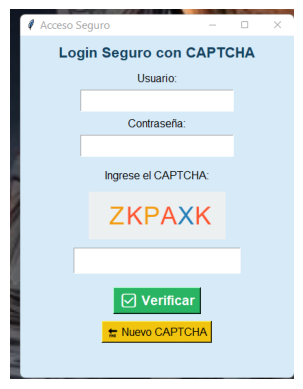

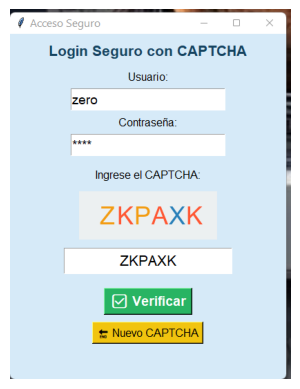

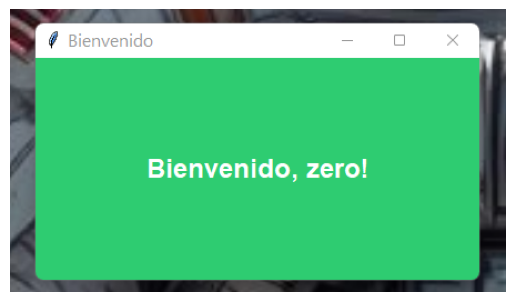

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/Captura de pantalla 2025-06-30 235541.png'
try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}.")

from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/Captura de pantalla 2025-06-30 235620.png'
try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}.")

from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/Captura de pantalla 2025-06-30 235634.png'
try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}.")